# Sanity Check

This is to ensure that everything is running smoothly


Want to print distributions for:
- ans_type
- structural
- semantic
- template
- answer distribution
- Number in each novel composition metric
- number in more / compo step
- number in each metric for indirect references


Want to check: 
- No negative scene graph indices
- programs count ( == count )
- answer distributions by local are decent

In [1]:
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data formats

In [2]:
def getAnsDict():
    ans_type = {'binary': 0, 'open': 0}
    return ans_type

def getSemDict():
    sem = {'object': 0, 'relation': 0, 'action': 0}
    return sem
    
def getGloDict():
    glob = {'obj-rel': 0,
             'superlative': 0,
             'exists': 0,
             'duration-comparison': 0,
             'obj-act': 0,
             'rel-act': 0,
             'sequencing': 0,
             'action-recognition': 0}
    return glob
    
def getStructDict():
    struct = {'query': 0, 'compare': 0, 'choose': 0, 'verify': 0, 'logic': 0}
    return struct

def getTemplDict():
    templ = {'objExists': 0, 'objRelExists': 0, 'relExists': 0, 'actExists': 0,
             'andObjRelExists': 0, 'xorObjRelExists': 0, 'objWhatGeneral': 0,
             'objWhat': 0, 'objWhatChoose': 0, 'actWhatAfterAll': 0, 'actWhatBefore': 0,
             'objFirst': 0, 'objFirstChoose': 0, 'objFirstVerify': 0, 'relFirst': 0, 'actFirst': 0,
             'objLast': 0, 'objLastChoose': 0, 'objLastVerify': 0, 'relLast': 0, 'actLast': 0,
             'actLengthLongerChoose': 0, 'actLengthShorterChoose': 0, 'actLengthLongerVerify': 0, 'actLengthShorterVerify': 0,
             'actLongest': 0, 'actShortest': 0,
             'actTime': 0, 'relTime': 0, 'objTime': 0}
    
    return templ

In [3]:


infile = open('../data/stsgs/train_stsgs.pkl', 'rb')
train_stsgs = pickle.load(infile)
infile.close()


infile = open('../data/stsgs/test_stsgs.pkl', 'rb')
test_stsgs = pickle.load(infile)
infile.close()


# Upload Data

In [4]:
d_path = 'dataset'

In [5]:
with open('../exports/%s/json_format_balanced_combined/test-0-1814.txt' % (d_path), 'rb') as f:
    test = json.load(f)
    
with open('../exports/%s/json_format_balanced_combined/train-0-7787.txt' % (d_path), 'rb') as f:
    train = json.load(f)
    

In [6]:
total = {}
total.update(test)
#total.update(train)

In [7]:
all_data = {}

for q_id in total:
    q = total[q_id]
    for i in q:
        if i in ['question', 'program', 'sg_grounding', 'direct_equiv']:
            continue
        all_data[i] = {}
        
    break

In [8]:
def add(dic, item):
    if item not in dic:
        dic[item] = 0
        
    dic[item] += 1
    

In [9]:
#ans = getAnsDict()
#sem = getSemDict()
#glo = getGloDict()
#stu = getStructDict()
#tem = getTemplDict()
#loc = {}

print("need to go through %s questions" % len(total))

for cnt, q_id in enumerate(list(total)):
    if cnt % 500000 == 0:
        print(cnt)
    q = total[q_id]
    
    for i in q:
        if i in ['question', 'program', 'sg_grounding', 'direct_equiv']:
            continue
            
        
        dic = all_data[i]
        
        if i == 'global':
            for g in q[i]:
                add(dic, g)
        else:
            add(dic, q[i])
        
    
    continue
    ans[q['ans_type']] += 1
    sem[q['semantic']] += 1
    stu[q['structural']] += 1
    glo[q['global']] += 1
    
    l = q['local']
    if l not in loc:
        loc[l] = 0
        
    loc[l] += 1
    
    

need to go through 669207 questions
0
500000


b,bhbjh
all_data = {}


for cnt, v_id in enumerate(list(test_stsgs)):
    
    with open('../exports/dataset/all/test/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
    if cnt == 0:
        # set up data struct
        for q_id in QA:
            q = QA[q_id]
            for i in q:
                if i in ['question', 'program', 'sg_grounding', 'direct_equiv']:
                    continue
                    
                if type(q[i]) == dict:
                    for j in q[i]:
                        all_data[j] = {}
                else:
                    all_data[i] = {}
                    
            break
            
    if cnt % 100 == 0:
        print(cnt)
    
        
    for q_id in QA:
        q = QA[q_id]
        for i in q:
            if i in ['question', 'program', 'sg_grounding', 'direct_equiv']:
                continue
                
            if type(q[i]) == dict:
                for j in q[i]:
                    dic = all_data[j]
                    if type(q[i][j]) != str:
                        continue
                    add(dic, q[i][j])


            else:
                dic = all_data[i]

                if i == 'global':
                    for g in q[i]:
                        add(dic, g)
                else:
                    add(dic, q[i])


# Print distributions

## Answer type

                global     num
0               exists   97362
1              obj-rel  521508
2          superlative  103090
3   action-recognition    1087
4              obj-act   44836
5           sequencing   87959
6              rel-act   21018
7  duration-comparison   13255


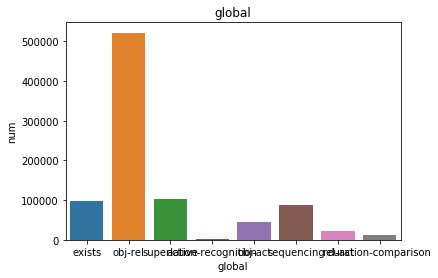

  ans_type     num
0   binary  332145
1     open  337062


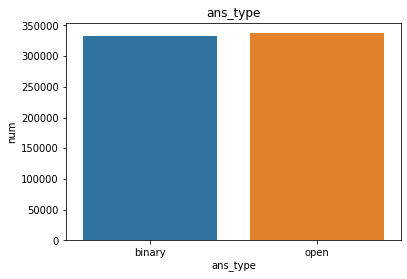

   steps     num
0      3   38064
1      1    9944
2      2   17374
3      4  158703
4      5  287585
5      6  111465
6      7   42895
7      8    3177


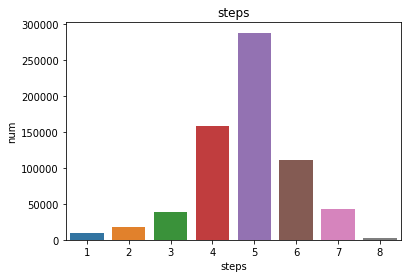

   semantic     num
0    object  536303
1  relation   96854
2    action   36050


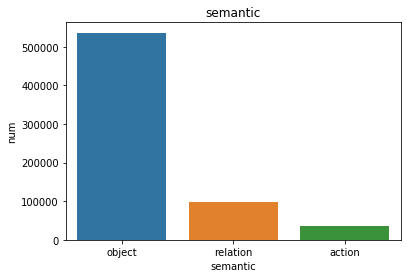

  structural     num
0     verify  106486
1      logic   34152
2      query  337062
3     choose   90995
4    compare  100512


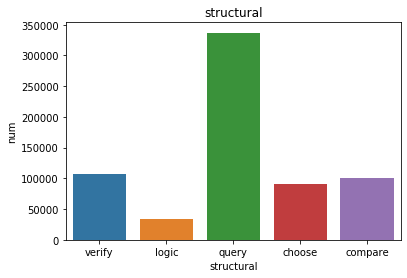

   novel_comp     num
0           0  578266
1           1   90941


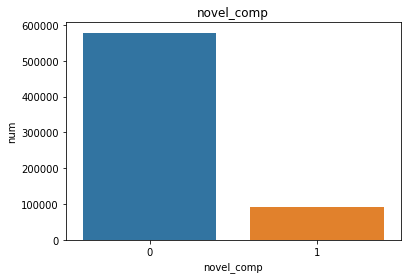

   more_steps     num
0           0  579561
1           1   89646


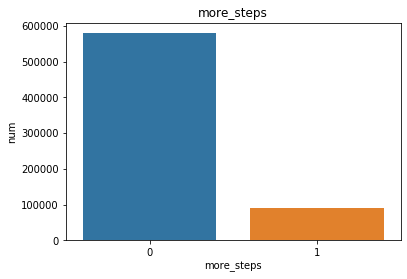

   nc_seq     num
0       0  635563
1       1   33644


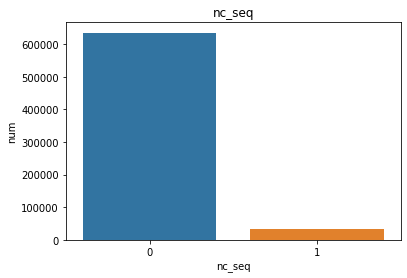

   nc_sup     num
0       0  628747
1       1   40460


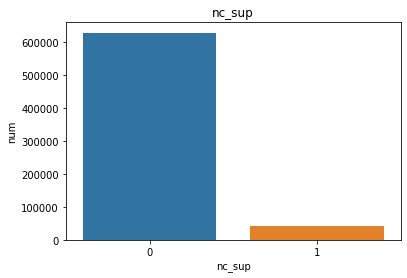

   nc_dur     num
0       0  663710
1       1    5497


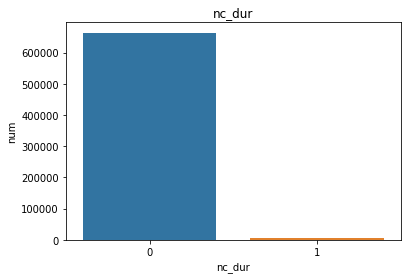

   nc_objrel     num
0          0  652181
1          1   17026


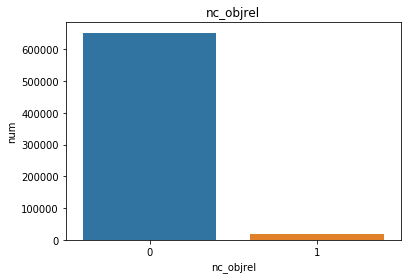

   indirect     num
0         1  589052
1         0   80155


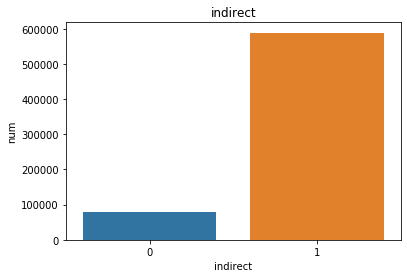

   i_obj     num
0      0  370526
1      1  298681


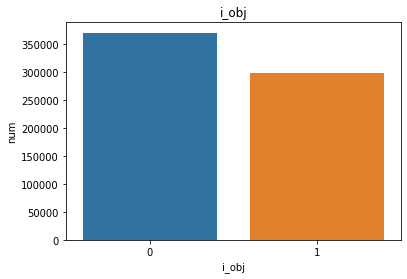

   i_rel     num
0      0  669207


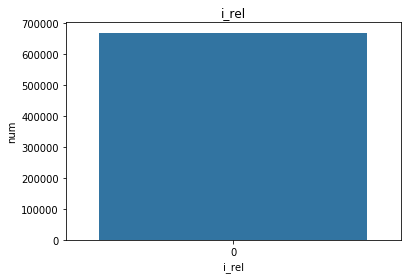

   i_act     num
0      0  664057
1      1    5150


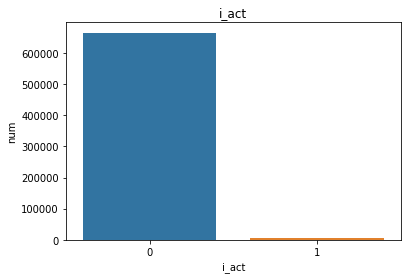

   i_temp     num
0       1  511738
1       0  157469


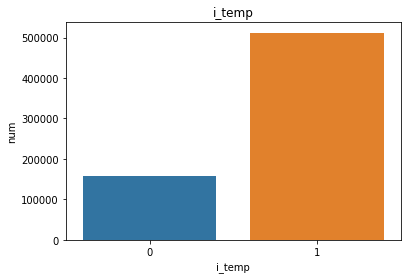

<Figure size 432x288 with 0 Axes>

In [10]:
for i in all_data:
    if i in ['local', 'answer','video_id']: 
        continue
        
    data = all_data[i]
    
    
    frame = [{i: key, 'num': num} for key, num in data.items()]
    df = pd.DataFrame(frame)
        
        
    print(df)
    plt.title(i)
    sns.barplot(x=i, y='num', data=df)
    plt.show()
    plt.clf()

In [1]:
x = {'logic': 17531902, 'verify': 11168463, 'choose': 1086442, 'query': 427527, 'compare': 128250}
     

In [2]:
tot = 0

for i in x:
    tot += x[i]
    
tot


30342584

# Enough per steps

In [78]:
all_qs = []


for cnt, v_id in enumerate(list(train_stsgs)):

    with open('../exports/dataset/balanced/train/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
    if cnt == 0:
        # set up data struct
        for q_id in QA:
            q = QA[q_id]
            for i in q:
                if i in ['question', 'program', 'sg_grounding', 'direct_equiv']:
                    continue
                    
                if type(q[i]) == dict:
                    for j in q[i]:
                        all_data[j] = {}
                else:
                    all_data[i] = {}
                    
            break
            
    if cnt % 100 == 0:
        print(cnt)
    
        
    for q_id in QA:
        q = QA[q_id]
        for t in q['attributes']:
            q[t] = q['attributes'][t]
        all_qs.append(q)
        

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700


In [79]:
df = pd.DataFrame(all_qs)

In [80]:
x = df#[df['steps'] == 6]
grouped = x.groupby(['type']).count()
grouped = grouped.reset_index().sort_values('question')

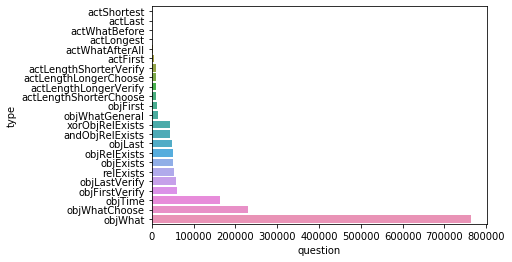

In [81]:
sns.barplot(data=grouped, y='type', x='question')

In [83]:
x = df#[df['steps'] == 1]
x.groupby(['answer']).count().sort_values('question')

,question,attributes,global,local,steps,id,metrics,program,sg_grounding,type,structural,semantic,ans_type,video_id
answer,,,,,,,,,,,,,,
No,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481
Yes,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481,188481
after,82074,82074,82074,82074,82074,82074,82074,82074,82074,82074,82074,82074,82074,82074
awakening in bed,190,190,190,190,190,190,190,190,190,190,190,190,190,190
bag,32452,32452,32452,32452,32452,32452,32452,32452,32452,32452,32452,32452,32452,32452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
watching something in a mirror,420,420,420,420,420,420,420,420,420,420,420,420,420,420
watching television,375,375,375,375,375,375,375,375,375,375,375,375,375,375
window,13992,13992,13992,13992,13992,13992,13992,13992,13992,13992,13992,13992,13992,13992


# todo

- check enough of each template
- check no negative scene graphs
- programs have right number of "(" as ")"
- local distributions are decent


- ensure everything works for just test set as well! YUP :)

In [11]:
ls = {}


for cnt, q_id in enumerate(list(total)):
    if cnt % 500000 == 0:
        print(cnt)
    q = total[q_id]
    l = q['local']#getBinaryCat(q)
    a = q['answer']
    
    if l not in ls:
        ls[l] = {}
        
    if a not in ls[l]:
        ls[l][a] = 0
    ls[l][a] += 1

0
500000


In [12]:
for l in ls:
    if len(ls[l]) ==1:
        print(l, ls[l])

r7-o15-o32-r7-o15-o32-all- {'table': 1}
r8-o8-o6-r8-o8-o6-after-c032 {'chair': 2}
r7-o32-o12-r7-o32-o12-while-c011 {'table': 1}
r7-o32-o12-r7-o32-o12-while-c059 {'table': 2}
r7-o36-o23-r7-o36-o23-all- {'paper': 1}
r22-o9-o23-r22-o9-o23-all- {'paper': 1}
r22-o22-o23-r22-o22-o23-all- {'paper': 1}
v023-o12-o17-v023-o12-o17-while-c014 {'dish': 1}
r8-o8-o15-r8-o8-o15-all- {'chair': 1}
r8-o4-o25-r8-o4-o25-all- {'picture': 1}
v023-o12-o17-v023-o12-o17-while-c051 {'food': 2}
r22-o9-o14-r22-o9-o14-all- {'doorknob': 1}
r7-o10-o32-r7-o10-o32-while-c009 {'clothes': 1}
r10-o10-o4-r10-o10-o4-while-c016 {'blanket': 1}
r8-o12-o15-r8-o12-o15-while-c152 {'dish': 1}
r8-o3-o33-r8-o3-o33-while-c011 {'television': 1}
r8-o33-o12-r8-o33-o12-while-c012 {'television': 1}
r8-o12-o33-r8-o12-o33-while-c012 {'television': 1}
r7-o12-o32-r7-o12-o32-all- {'table': 1}
r9-o15-o10-r9-o15-o10-while-c061 {'doorway': 2}
r9-o15-o10-r9-o15-o10-while-c065 {'doorway': 2}
r7-o23-o4-r7-o23-o4-all- {'paper': 1}
r7-o32-o19-r7-o32-o

In [13]:
templs = getTemplDict()
for cnt, v_id in enumerate(list(train_stsgs)):
    if cnt % 500 == 0:
        print(cnt)
    
    with open('../exports/dataset/balanced/train/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
    for q_id in QA:
        q = QA[q_id]
        t = q['attributes']['type']

        templs[t] += 1

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [14]:
templs

{'objExists': 51192,
 'objRelExists': 51010,
 'relExists': 53428,
 'actExists': 0,
 'andObjRelExists': 43142,
 'xorObjRelExists': 42800,
 'objWhatGeneral': 13816,
 'objWhat': 762916,
 'objWhatChoose': 229860,
 'actWhatAfterAll': 2813,
 'actWhatBefore': 1468,
 'objFirst': 12881,
 'objFirstChoose': 10689,
 'objFirstVerify': 59870,
 'relFirst': 0,
 'actFirst': 4456,
 'objLast': 48546,
 'objLastChoose': 14096,
 'objLastVerify': 57062,
 'relLast': 0,
 'actLast': 969,
 'actLengthLongerChoose': 9350,
 'actLengthShorterChoose': 9350,
 'actLengthLongerVerify': 9350,
 'actLengthShorterVerify': 9108,
 'actLongest': 1579,
 'actShortest': 115,
 'actTime': 10956,
 'relTime': 16880,
 'objTime': 73192}

In [15]:

for cnt, q_id in enumerate(list(total)):
    if cnt % 500000 == 0:
        print(cnt)
    q = total[q_id]
    
    p = q['program']
    
    forw = p.count('(')
    back = p.count(')')
    
    if forw != back:
        print(p)

0
500000


In [16]:

for cnt, q_id in enumerate(list(total)):
    if cnt % 500000 == 0:
        print(cnt)
    q = total[q_id]
    
    
    sg = q['sg_grounding']
    for key in sg:
        if len(key.split('-')) > 2:
            print(key)

0
500000


# check locals

In [13]:
df = pd.DataFrame(all_data)

In [24]:
ans = all_data['answer']

ans

{'pillow': 8054,
 'blanket': 27673,
 'yes': 67519,
 'tidying up a blanket': 43,
 'before': 39822,
 'after': 39822,
 'dish': 30023,
 'window': 5111,
 'chair': 28542,
 'vacuum': 1725,
 'no': 67519,
 'smiling at something': 332,
 'sitting in a chair': 210,
 'holding a dish': 279,
 'laughing at something': 199,
 'holding a cup of something': 361,
 'holding a vacuum': 41,
 'watching outside of a window': 77,
 'standing up': 326,
 'clothes': 24178,
 'mirror': 7336,
 'phone': 8752,
 'food': 28048,
 'table': 27136,
 'paper': 22016,
 'holding some food': 405,
 'holding a book': 197,
 'making some food': 93,
 'doorway': 14876,
 'closet': 17572,
 'light': 2464,
 'door': 9948,
 'closing a door': 8,
 'watching something in a mirror': 105,
 'tidying up a closet': 67,
 'washing something with a blanket': 84,
 'holding a blanket': 326,
 'floor': 20529,
 'sitting on the floor': 134,
 'working on a book': 39,
 'laptop': 9813,
 'holding a laptop': 75,
 'undressing themselves': 77,
 'doorknob': 9876,
 'be

In [40]:
len(test)

1024871

In [41]:
len(train)

2483144

In [12]:
for i in total:
    print(total[i])
    break

{'question': 'Were they touching a blanket?', 'answer': 'yes', 'video_id': 'YSKX3', 'global': ['exists'], 'local': 'yes-no-o4', 'ans_type': 'binary', 'steps': 1, 'semantic': 'object', 'structural': 'verify', 'novel_comp': 0, 'more_steps': 0, 'program': 'Exists(blanket, Iterate(video, Filter(frame, [objects])))', 'sg_grounding': {'19-28': ['o4/000209', 'o4/000105', 'o4/000224', 'o4/000134', 'o4/000223', 'o4/000163', 'o4/000192'], '27-27': ['000105', '000134', '000163', '000192', '000205', '000209', '000221', '000223', '000224', '000235', '000237', '000239', '000247', '000252', '000254', '000258', '000268', '000269', '000270']}, 'nc_seq': 0, 'nc_sup': 0, 'nc_dur': 0, 'nc_objrel': 0, 'indirect': 0, 'i_obj': 0, 'i_rel': 0, 'i_act': 0, 'i_temp': 0, 'direct_equiv': 'YSKX3-9'}


# Problems
- Novel compositions obj-rel!!!
     - check if they're both in scene graphs!!!
     - actually programs
     - but an issue -- because might be in separate parts. also because if indirect ref refers to an object, then it won't be in. so we'll also have to look at args?
     - and there's still a problem for generating new ones...
     
     
     1- if it's in the args (+ answer), then objrel
     2- if they're both in program, then objrel
         - 
     
     
- too small
    - we're going to replace the existing balancing!!!
    - NO NOT DIFFERENT ALL oh this is good
    - ok so we replace all actTime with new balanced actTime, and add balanced logic
    - and then delete any between in balanced with negative scene graphs!!
    
    
- and i havent actually fixed what's the problem in struct

In [ ]:
Exists(blanket, Iterate(video, Filter(frame, [objects])))

In [15]:
nc = {
    0: 0,
    1: 0,
}



for cnt, v_id in enumerate(list(test_stsgs)[:50]):
    
    with open('../exports/dataset/all/test/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
    if cnt % 10 == 0:
        print(cnt)
        
    for q_id in QA:
        q = QA[q_id]
        m = q['metrics']['novel_comp'][-1]
        nc[m] += 1
        
nc


0


{0: 1611348, 1: 44334}

In [29]:
nc = {
    0: 0,
    1: 0,
}

to_del = set()

for cnt, v_id in enumerate(list(train_stsgs)):
    
    with open('../exports/dataset/balanced_copy/train/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
    if cnt % 500 == 0:
        print(cnt)
        
    for q_id in QA:
        q = QA[q_id]
        
        #if q['attributes']['type'] in ['xorObjRelExists', 'andObjRelExists']:
        if q['attributes']['type'] in ['actTime']:
            to_del.add(q_id)
            
            continue
        
        #sg = q['sg_grounding']
        #for key in sg:
        #    if len(key.split('-')) > 2:
        #        to_del.add(key)

    
len(to_del)


0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


100178

# train
>>> new
2016295
>>> fixed
2203065
>>> deleted
1970207
>>> old
2483144
>>> old - deleted
512937



# i will probs need to add in between!!

In [34]:
# what's in copy but not in balanced fixed


nc = {
    0: 0,
    1: 0,
}

not_in_fix = []

for cnt, v_id in enumerate(list(test_stsgs)):
    with open('../exports/dataset/balanced_/test/%s.txt'% v_id, 'rb') as f:
        QA_copy = json.load(f)
    with open('../exports/dataset/balanced_fixed/test/%s.txt'% v_id, 'rb') as f:
        QA_fixed = json.load(f)
    if cnt % 500 == 0:
        print(cnt)
        
    for q_id in QA_copy:
        
        if q_id not in QA_fixed:
            not_in_fix.append(q_id)


0
500
1000
1500


In [31]:
len(not_in_fix)

293151

In [35]:
len(not_in_fix) # test

132940

In [11]:
by_vid = {}

for q_id in not_in_fix:
    v_id = q_id[:5]
    if v_id not in by_vid:
        by_vid[v_id] = []
        
    by_vid[v_id].append(q_id)
    
    
for v_id in by_vid:
    by_vid[v_id] = list(set(by_vid[v_id]))

NameError: name 'not_in_fix' is not defined

In [14]:
templs = {}
neg_sg = {
    0: 0,
    1: 0
}
for cnt, v_id in enumerate(list(train_stsgs)):
    if cnt % 500 == 0:
        print(cnt)
    with open('../exports/dataset/balanced/train/%s.txt'% v_id, 'rb') as f:
        QA = json.load(f)
        
    #if v_id not in by_vid:
    #    continue
    for q_id in QA:
        q = QA[q_id]
        t = q['attributes']['type']
        
        
        
        sg = q['sg_grounding']
        neg_key = False
        for key in sg:
            if len(key.split('-')) > 2:
                neg_key = True
                break
        if neg_key:
            neg_sg[1] += 1
        else:
            neg_sg[0] += 1
            if t not in templs:
                templs[t] = 0

            templs[t] += 1
                

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500


In [22]:
templs

{'objRelExists': 39584,
 'objWhatGeneral': 14576,
 'objWhat': 619224,
 'actWhatBefore': 1618,
 'objFirst': 53870,
 'actFirst': 4892,
 'objLast': 85232,
 'objLastChoose': 78692,
 'actLast': 1029,
 'relTime': 99352,
 'objLastVerify': 43562,
 'objWhatChoose': 93854,
 'objFirstChoose': 78616,
 'objFirstVerify': 46912,
 'actTime': 100408,
 'actLengthLongerChoose': 9350,
 'actLengthShorterChoose': 9350,
 'actLengthLongerVerify': 9350,
 'actLengthShorterVerify': 9350,
 'actWhatAfterAll': 3285,
 'actShortest': 418,
 'actLongest': 1981,
 'objExists': 39306,
 'objTime': 418,
 'andObjRelExists': 39306,
 'relExists': 39306,
 'xorObjRelExists': 39306,
 'actExists': 39306}

In [15]:
templs

{'objWhatGeneral': 14175,
 'objWhat': 599777,
 'actWhatBefore': 1513,
 'objFirst': 52296,
 'actFirst': 4673,
 'objLast': 81199,
 'objLastChoose': 76470,
 'objLastVerify': 40966,
 'actLast': 1018,
 'relTime': 95176,
 'objWhatChoose': 93770,
 'objFirstChoose': 75568,
 'objFirstVerify': 46912,
 'actTime': 95128,
 'actLengthLongerChoose': 9350,
 'actLengthShorterChoose': 9350,
 'actLengthLongerVerify': 9350,
 'actLengthShorterVerify': 9350,
 'actWhatAfterAll': 3109,
 'actShortest': 418,
 'actLongest': 1981,
 'objRelExists': 38008,
 'objTime': 396,
 'objExists': 38008,
 'andObjRelExists': 38008,
 'relExists': 38008,
 'xorObjRelExists': 38008,
 'actExists': 38008}

In [16]:
neg_sg

{0: 1549993, 1: 0}

# No repeating programs in a video

In [29]:
cnt = 0
cnt_good = 0
repetition = {}
for v_id in list(test_stsgs):
    with open('../exports/dataset/balanced/test/%s.txt' % v_id, 'rb') as f:
        QA = json.load(f)

    progs = {}
    repetition[v_id] = {}
    for q_id in QA:
        q = QA[q_id]
        p = q['program']
        t = q['answer']#q['attributes']['type']
        
        if p not in repetition[v_id]:
            repetition[v_id][p] = {}
            cnt_good += 1
        else:
            print()
            print('raising cnt for %s' % (q_id))
            print('program is %s', p)
            print('prev answers are: ', repetition[v_id][p])
            print('current answer is: ', q['answer'])
            cnt += 1
            
        if t not in repetition[v_id][p]:
            repetition[v_id][p][t] = 0
        repetition[v_id][p][t] += 1#.append((q['question'], q_id, q['attributes']['type']))

cnt, cnt_good


raising cnt for HSWPR-13084
program is %s Compare([before, after], Exists(drinking from, Iterate(Localize(temporal tag, ToAction(turning, Query(class, OnlyItem(Iterate(video, Filter(frame, [relations, fixing, objects])))))), Filter(frame, [relations]))))
prev answers are:  {'before': 1}
current answer is:  before

raising cnt for HSWPR-13094
program is %s Compare([before, after], Exists(drinking from a cup, Iterate(Localize(temporal tag, ToAction(turning, Query(class, OnlyItem(Iterate(video, Filter(frame, [relations, fixing, objects])))))), Filter(frame, [actions]))))
prev answers are:  {'before': 1}
current answer is:  before

raising cnt for HSWPR-13097
program is %s Compare([before, after], Exists(holding a cup of something, Iterate(Localize(temporal tag, ToAction(turning, Query(class, OnlyItem(Iterate(video, Filter(frame, [relations, fixing, objects])))))), Filter(frame, [actions]))))
prev answers are:  {'before': 1}
current answer is:  before

raising cnt for C6C7Q-15861
program 

(5, 669202)

In [22]:
if False:
    for v_id in repetition:
        for p in repetition[v_id]:
            qs = repetition[v_id][p]

            if len(qs) > 1:
                print()
                print(v_id)
                print(p)
                for q in qs:
                    print(' '*4, q)
                    


YSKX3
Exists(blanket, Iterate(Localize(while, holding a pillow), Filter(frame, [objects])))
     objExists

T5ECU
Exists(vacuum, Iterate(Localize(before, smiling at something), Filter(frame, [objects])))
     objExists

AAH6R
Exists(chair, Iterate(Localize(before, undressing themselves), Filter(frame, [objects])))
     objExists

015XE
Exists(dish, Iterate(video, Filter(frame, [objects])))
     objExists

TJZ0P
Exists(table, Iterate(Localize(after, putting a book somewhere), Filter(frame, [objects])))
     objExists

B82GJ
Exists(doorknob, Iterate(video, Filter(frame, [objects])))
     objExists

A1BS2
Exists(blanket, Iterate(Localize(after, holding a cup of something), Filter(frame, [objects])))
     objExists

ZBBOO
Exists(paper, Iterate(Localize(while, drinking from a cup), Filter(frame, [objects])))
     objExists

AF8I2
Exists(food, Iterate(Localize(before, holding a book), Filter(frame, [objects])))
     objExists

4WVTC
Exists(laptop, Iterate(Localize(while, taking a blanket fr

Exists(blanket, Iterate(Localize(before, talking on a phone), Filter(frame, [objects])))
     objExists

OT35M
Exists(refrigerator, Iterate(video, Filter(frame, [objects])))
     objExists

7R44Z
Exists(vacuum, Iterate(Localize(before, sneezing somewhere), Filter(frame, [objects])))
     objExists

W0QSB
Exists(vacuum, Iterate(Localize(after, making some food), Filter(frame, [objects])))
     objExists

UMTLM
Exists(laptop, Iterate(Localize(after, washing their hands), Filter(frame, [objects])))
     objExists

UPT25
Exists(laptop, Iterate(Localize(before, going from standing to sitting), Filter(frame, [objects])))
     objExists

C83CH
Exists(box, Iterate(video, Filter(frame, [objects])))
     objExists

KWJ5O
Exists(chair, Iterate(Localize(after, putting some food somewhere), Filter(frame, [objects])))
     objExists

5NG6Q
Exists(blanket, Iterate(Localize(before, taking a dish from somewhere), Filter(frame, [objects])))
     objExists

9LRJZ
Exists(paper, Iterate(Localize(before, pu

     objExists

P8G8V
Exists(phone, Iterate(Localize(before, drinking from a cup), Filter(frame, [objects])))
     objExists

NF45F
Exists(table, Iterate(video, Filter(frame, [objects])))
     objExists

17LNN
Exists(blanket, Iterate(Localize(after, taking food from somewhere), Filter(frame, [objects])))
     objExists

27DCQ
Exists(bed, Iterate(Localize(while, taking a broom from somewhere), Filter(frame, [objects])))
     objExists

1VRH1
Exists(paper, Iterate(Localize(before, awakening in bed), Filter(frame, [objects])))
     objExists

OTUV7
Exists(table, Iterate(Localize(before, undressing themselves), Filter(frame, [objects])))
     objExists

0F7LW
Exists(closet, Iterate(Localize(while, turning off a light), Filter(frame, [objects])))
     objExists

G8NEV
Exists(food, Iterate(Localize(before, closing a book), Filter(frame, [objects])))
     objExists

Y3M3W
Exists(pillow, Iterate(Localize(before, watching a book), Filter(frame, [objects])))
     objExists

O76GM
Exists(doorknob

     objExists

65UVU
Exists(box, Iterate(video, Filter(frame, [objects])))
     objExists

BRBWJ
Exists(table, Iterate(Localize(while, undressing themselves), Filter(frame, [objects])))
     objExists

YX3V0
Exists(table, Iterate(Localize(before, taking a book from somewhere), Filter(frame, [objects])))
     objExists

4RT06
Exists(food, Iterate(Localize(between, [taking a dish from somewhere, holding a bag]), Filter(frame, [objects])))
     objExists

W65FZ
Exists(bed, Iterate(Localize(while, snuggling with a pillow), Filter(frame, [objects])))
     objExists

5GP8M
Exists(phone, Iterate(Localize(before, laughing at a picture), Filter(frame, [objects])))
     objExists

6B2FN
Exists(mirror, Iterate(Localize(before, taking a broom from somewhere), Filter(frame, [objects])))
     objExists

U0P7W
Exists(picture, Iterate(Localize(before, grasping onto a doorknob), Filter(frame, [objects])))
     objExists

HSEH1
Exists(chair, Iterate(Localize(while, fixing a light), Filter(frame, [objec

QYM5H
Exists(refrigerator, Iterate(Localize(between, [putting a blanket somewhere, smiling at something]), Filter(frame, [objects])))
     objExists

R55C1
Exists(chair, Iterate(Localize(before, holding some medicine), Filter(frame, [objects])))
     objExists

5TKIB
Exists(blanket, Iterate(video, Filter(frame, [objects])))
     objExists

AL1WC
Exists(refrigerator, Iterate(Localize(before, making some food), Filter(frame, [objects])))
     objExists

13IS9
Exists(bed, Iterate(Localize(between, [taking shoes from somewhere, holding a laptop]), Filter(frame, [objects])))
     objExists

FQOGZ
Exists(dish, Iterate(Localize(before, consuming some medicine), Filter(frame, [objects])))
     objExists

B47TS
Exists(table, Iterate(Localize(while, washing their hands), Filter(frame, [objects])))
     objExists

WC5QK
Exists(chair, Iterate(Localize(before, putting a blanket somewhere), Filter(frame, [objects])))
     objExists

Y2EID
Exists(door, Iterate(Localize(before, fixing their hair), Fil

In [38]:
13149 / (13149 + 613135)

0.020995267322812015

In [5]:
if False:
    for v_id in repetition:
        for p in repetition[v_id]:
            qs = repetition[v_id][p]

            if len(qs) > 1:
                print()
                print(v_id)
                print(p)
                for q in qs:
                    print(' '*4, q, qs)

In [11]:
cnt = 0
cnt_good = 0
templs = {}
repetition = {}
for v_id in list(test_stsgs):
    with open('../exports/dataset/balanced/test/%s.txt' % v_id, 'rb') as f:
        QA = json.load(f)

    progs = {}
    repetition[v_id] = {}
    for q_id in QA:
        q = QA[q_id]
        p = q['program']
        t = q['attributes']['type']
        a = q['answer']
        
        if p not in repetition[v_id]:
            cnt_good += 1
        else:
            cnt += 1
            if t not in templs:
                templs[t] = {}
            if a not in templs[t]:
                templs[t][a] = 0
            templs[t][a] += 1
            
        repetition[v_id][p] = 0

cnt, cnt_good

(0, 606407)

In [12]:
templs

{}

In [14]:
626284 - 606407

19877

In [ ]:
(0, 192923)
(6895, 192923)